In [ ]:
#####Q1

In [6]:
import pandas as pd

In [10]:
import os
os.getcwd()

'C:\\Users\\MAHESH'

In [67]:
df=pd.read_csv("FOMC_minutes.csv")

In [68]:
df.head(1)

,date,statements
0,2/4/1994,Chairman Alan Greenspan announced today that t...


In [69]:
df['new_date']=pd.to_datetime(df['date'])

In [169]:
def get_year(x):
    return x.year

def get_month(x):
    return x.month

#Defined it this way because many times fiscal year
#/accounting year & financial years are different
def get_q(x):
    if(x.month==1 or x.month==2 or x.month==3):
        return 'Q1'
    elif(x.month==4 or x.month==5 or x.month==6):
        return 'Q2'
    elif(x.month==7 or x.month==8 or x.month==9):
        return 'Q3'
    else:
        return 'Q4'

In [93]:
df['year']=df.new_date.apply(get_year)
df['month']=df.new_date.apply(get_month)
df['quarter']=df.new_date.apply(get_q)
df.head(3)

,date,statements,new_date,year,month,quarter
0,2/4/1994,Chairman Alan Greenspan announced today that t...,1994-02-04,1994,2,Q1
1,3/22/1994,Chairman Alan Greenspan announced today that t...,1994-03-22,1994,3,Q1
2,4/18/1994,Chairman Alan Greenspan announced today that t...,1994-04-18,1994,4,Q2


In [102]:
df['words']=df.statements.str.findall(r"\w+\s")
df['WordCount']=df.words.apply(len)

In [104]:
df.head(3)

,date,statements,new_date,year,month,quarter,words,WordCount
0,2/4/1994,Chairman Alan Greenspan announced today that t...,1994-02-04,1994,2,Q1,"[Chairman , Alan , Greenspan , announced , tod...",94
1,3/22/1994,Chairman Alan Greenspan announced today that t...,1994-03-22,1994,3,Q1,"[Chairman , Alan , Greenspan , announced , tod...",37
2,4/18/1994,Chairman Alan Greenspan announced today that t...,1994-04-18,1994,4,Q2,"[Chairman , Alan , Greenspan , announced , tod...",34


In [106]:
frame1=df.groupby('quarter').sum()
print(frame1['WordCount'])

quarter
Q1    12613
Q2    11930
Q3    11881
Q4    13122
Name: WordCount, dtype: int64


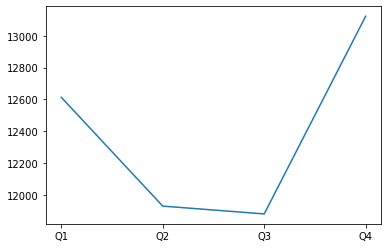

In [114]:
import matplotlib.pyplot as plt
plt.plot(frame1['WordCount'])

In [ ]:
#####Q2

In [115]:
import numpy as np

In [121]:
np.random.multinomial(1000, [0.2,0.1,0.4,0.1,0.20], size=1)

array([[183, 108, 414, 101, 194]])

In [122]:
np.random.multinomial(1000, [0.2,0.1,0.4,0.1,0.20], size=100)

array([[204, 113, 386,  99, 198],
       [196,  91, 387, 113, 213],
       [201,  93, 409,  88, 209],
       [208,  94, 408,  83, 207],
       [226, 107, 388,  94, 185],
       [200,  94, 412, 101, 193],
       [201, 109, 383, 110, 197],
       [181,  84, 427,  90, 218],
       [215, 104, 394, 100, 187],
       [208, 112, 395,  95, 190],
       [194,  91, 436,  90, 189],
       [209, 107, 376, 113, 195],
       [216,  90, 395, 103, 196],
       [197, 105, 388,  96, 214],
       [203, 103, 388,  96, 210],
       [195,  89, 406, 102, 208],
       [201,  88, 395, 103, 213],
       [218, 102, 407,  84, 189],
       [207,  95, 412, 104, 182],
       [194, 107, 420,  93, 186],
       [219,  84, 387, 103, 207],
       [211,  70, 409, 114, 196],
       [220,  92, 388, 111, 189],
       [203, 131, 376, 104, 186],
       [212, 120, 369, 103, 196],
       [212,  86, 400, 104, 198],
       [201, 101, 385,  97, 216],
       [208,  83, 396, 108, 205],
       [181, 108, 394, 118, 199],
       [209,  

In [131]:
np.random.multinomial(1000, [0.2,0.1,0.4,0.1,0.20], size=100).sum(0)

array([20223,  9910, 40068,  9904, 19895])

In [158]:
np.random.multinomial(1000, [0.2,0.1,0.4,0.1,0.20], size=100).sum(0)/(1000*100)

array([0.19989, 0.09966, 0.40042, 0.10099, 0.19904])

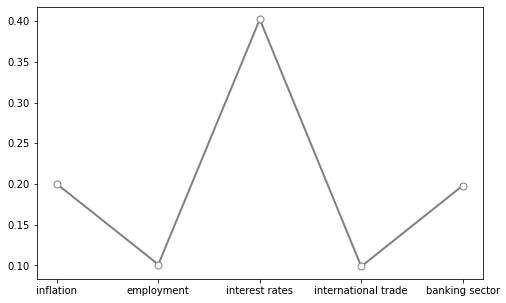

In [165]:
proportion=np.random.multinomial(1000, [0.2,0.1,0.4,0.1,0.20], size=100).sum(0)/(1000*100)
x_lab=['inflation','employment','interest rates','international trade','banking sector']
t1=pd.DataFrame(proportion)
t1.index = x_lab
plt.figure(figsize=(8, 5))
plt.plot(t1,'-ok', color='gray',
         markersize=7, linewidth=2,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=1)

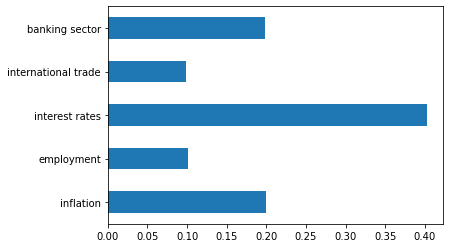

In [168]:
t1.plot.barh(legend=False)

In [ ]:
#By increasing the number of simulations, the proportion of words suggest that
#the expected mean tends closer to true mean